In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score,recall_score,f1_score,precision_score

# Loading dataset

In [2]:
df=pd.read_csv('train_loan.csv')
df1=df
df.sample(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
290,LP001936,Male,Yes,0,Graduate,No,3075,2416.0,139.0,360.0,1.0,Rural,Y
34,LP001100,Male,No,3+,Graduate,No,12500,3000.0,320.0,360.0,1.0,Rural,N
579,LP002888,Male,No,0,Graduate,NaN,3182,2917.0,161.0,360.0,1.0,Urban,Y
232,LP001770,Male,No,0,Not Graduate,No,3189,2598.0,120.0,NaN,1.0,Rural,Y
231,LP001768,Male,Yes,0,Graduate,NaN,3716,0.0,42.0,180.0,1.0,Rural,Y


In [3]:
df=df.drop(columns=['Loan_ID'])
df.sample(5)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


# Preprocessing the dataset

In [4]:
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [5]:
df['Gender'].mode()

0    Male
Name: Gender, dtype: object

In [6]:
#fill nulls for categorical attributes
df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0])
df['Married']=df['Married'].fillna(df['Married'].mode()[0])
df['Dependents']=df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed']=df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [7]:
#fill nulls for numerical attributes
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].median())
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median())
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].median())

In [8]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Exploratory Data Analysis

C:\Users\venka\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

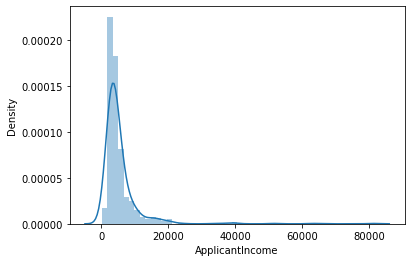

In [9]:
#visualize numerical attributes
sns.distplot(df['ApplicantIncome'])

C:\Users\venka\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

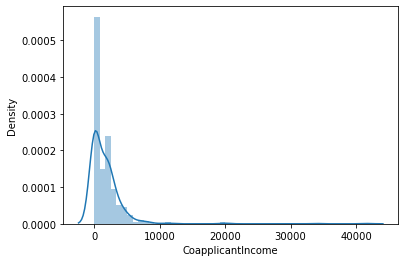

In [10]:
sns.distplot(df['CoapplicantIncome'])

C:\Users\venka\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

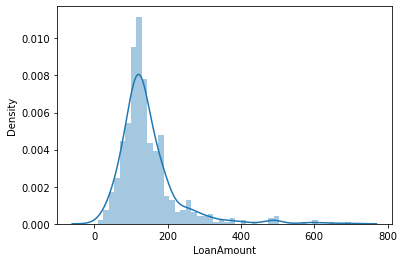

In [11]:
sns.distplot(df['LoanAmount'])

C:\Users\venka\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Density'>

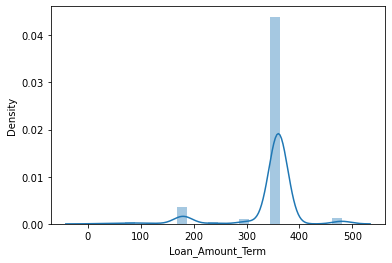

In [12]:
sns.distplot(df['Loan_Amount_Term'])

C:\Users\venka\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Credit_History', ylabel='Density'>

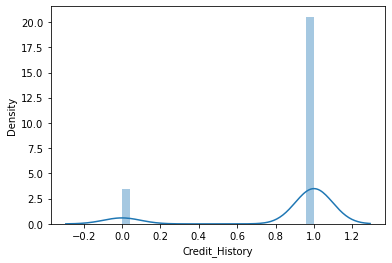

In [13]:
sns.distplot(df['Credit_History'])

C:\Users\venka\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Property_Area', ylabel='count'>

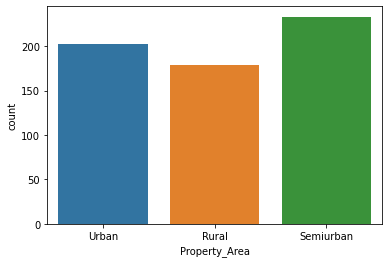

In [14]:
#visualize categorical data
sns.countplot(df['Property_Area'])

C:\Users\venka\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

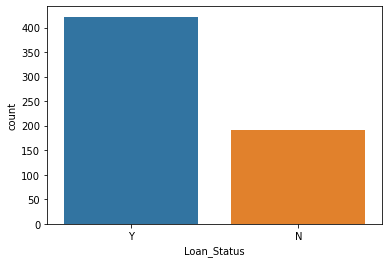

In [15]:
sns.countplot(df['Loan_Status'])

C:\Users\venka\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

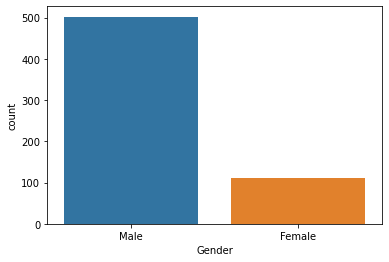

In [16]:
sns.countplot(df['Gender'])

C:\Users\venka\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Married', ylabel='count'>

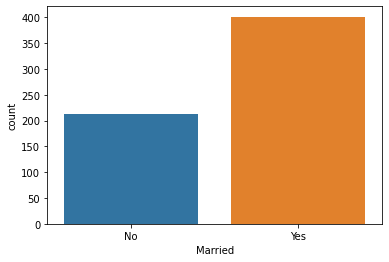

In [17]:
sns.countplot(df['Married'])

C:\Users\venka\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Dependents', ylabel='count'>

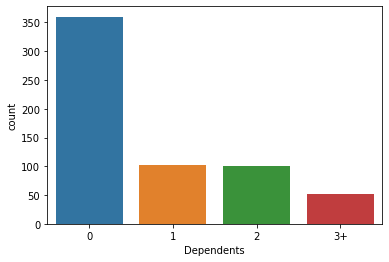

In [18]:
sns.countplot(df['Dependents'])

C:\Users\venka\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Education', ylabel='count'>

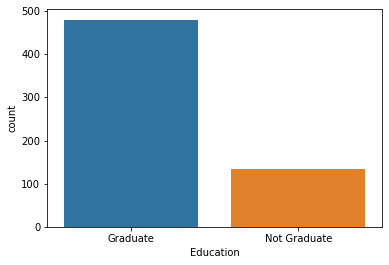

In [19]:
sns.countplot(df['Education'])

C:\Users\venka\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

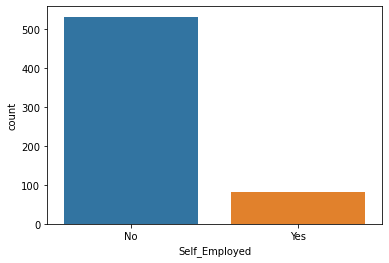

In [20]:
sns.countplot(df['Self_Employed'])

In [21]:

df['TotalIncome']=df['ApplicantIncome']+df['CoapplicantIncome']
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,5849.0
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0


#  Log Transform

C:\Users\venka\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ApplicantIncomeLog', ylabel='Density'>

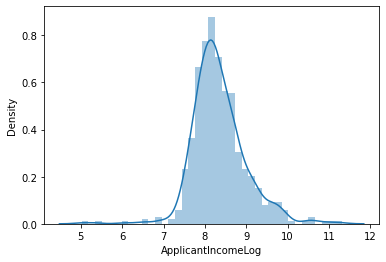

In [22]:
df['ApplicantIncomeLog']=np.log(df['ApplicantIncome']+1)
sns.distplot(df['ApplicantIncomeLog'])

C:\Users\venka\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CoapplicantIncomeLog', ylabel='Density'>

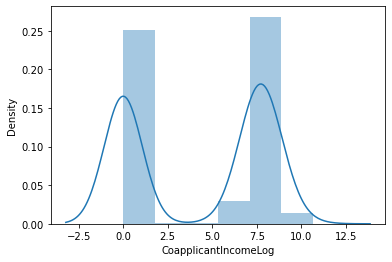

In [23]:
df['CoapplicantIncomeLog'] = np.log(df['CoapplicantIncome']+1)
sns.distplot(df["CoapplicantIncomeLog"])

C:\Users\venka\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LoanAmountLog', ylabel='Density'>

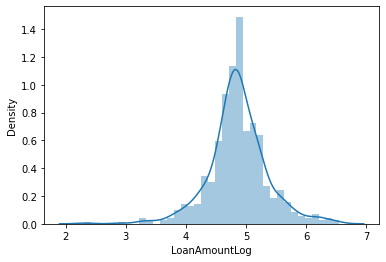

In [24]:
df['LoanAmountLog'] = np.log(df['LoanAmount']+1)
sns.distplot(df["LoanAmountLog"])

C:\Users\venka\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Loan_Amount_Term_Log', ylabel='Density'>

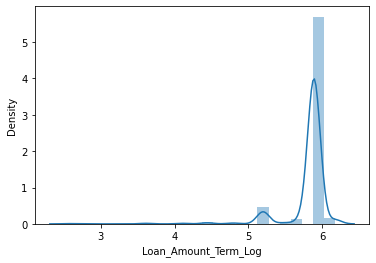

In [25]:
df['Loan_Amount_Term_Log'] = np.log(df['Loan_Amount_Term']+1)
sns.distplot(df["Loan_Amount_Term_Log"])

C:\Users\venka\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Credit_History_Log', ylabel='Density'>

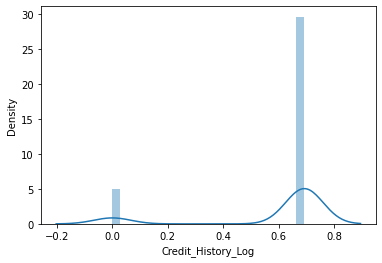

In [26]:
df['Credit_History_Log'] = np.log(df['Credit_History']+1)
sns.distplot(df["Credit_History_Log"])

C:\Users\venka\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='TotalIncomeLog', ylabel='Density'>

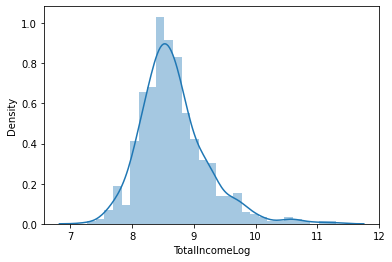

In [27]:
df['TotalIncomeLog'] = np.log(df['TotalIncome']+1)
sns.distplot(df["TotalIncomeLog"])

In [28]:
df.sample(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome,ApplicantIncomeLog,CoapplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Credit_History_Log,TotalIncomeLog
585,Male,Yes,1,Graduate,No,4283,3000.0,172.0,84.0,1.0,Rural,N,7283.0,8.362642,8.006701,5.153292,4.442651,0.693147,8.893435
514,Male,No,0,Graduate,No,5815,3666.0,311.0,360.0,1.0,Rural,N,9481.0,8.668368,8.207129,5.743003,5.888878,0.693147,9.157151
185,Male,Yes,0,Graduate,Yes,39147,4750.0,120.0,360.0,1.0,Semiurban,Y,43897.0,10.575105,8.466110,4.795791,5.888878,0.693147,10.689624
44,Male,Yes,0,Not Graduate,Yes,4695,0.0,96.0,360.0,1.0,Urban,Y,4695.0,8.454466,0.000000,4.574711,5.888878,0.693147,8.454466
176,Male,Yes,2,Graduate,No,2045,1619.0,101.0,360.0,1.0,Rural,Y,3664.0,7.623642,7.390181,4.624973,5.888878,0.693147,8.206584


In [29]:
cols=['ApplicantIncome','CoapplicantIncome']
df=df.drop(columns=cols)
df.sample(5)

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome,ApplicantIncomeLog,CoapplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Credit_History_Log,TotalIncomeLog
532,Male,No,2,Graduate,No,110.0,360.0,0.0,Rural,N,3588.0,8.185629,0.000000,4.709530,5.888878,0.000000,8.185629
201,Male,No,2,Graduate,No,166.0,360.0,0.0,Semiurban,Y,4923.0,8.501876,0.000000,5.117994,5.888878,0.000000,8.501876
524,Male,No,0,Graduate,No,128.0,360.0,1.0,Semiurban,N,6767.0,8.451267,7.643962,4.859812,5.888878,0.693147,8.819961
257,Male,Yes,3+,Graduate,No,94.0,360.0,1.0,Urban,N,5250.0,8.566174,0.000000,4.553877,5.888878,0.693147,8.566174
285,Male,No,0,Graduate,No,89.0,360.0,1.0,Rural,Y,6211.0,8.058011,8.024207,4.499810,5.888878,0.693147,8.734238


#  Correlation matrix

<AxesSubplot:>

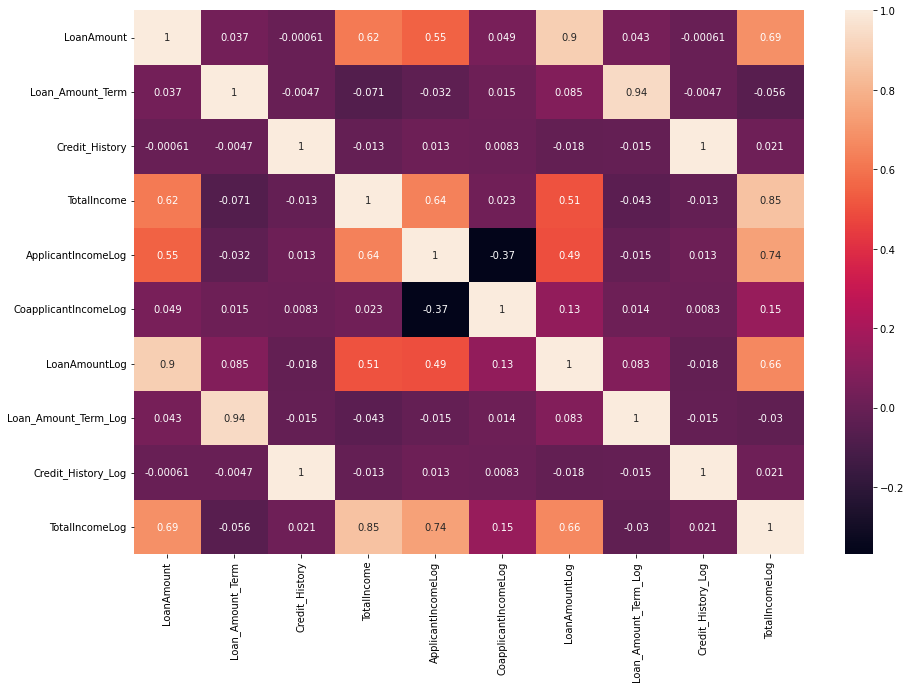

In [30]:
corr=df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr,annot=True)

# Label_Encoding

In [31]:
cols=['Gender','Married','Education','Self_Employed','Property_Area','Loan_Status','Dependents']
le=LabelEncoder()
for c in cols:
    df[c]=le.fit_transform(df[c])
df.head()

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome,ApplicantIncomeLog,CoapplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Credit_History_Log,TotalIncomeLog
0,1,0,0,0,0,128.0,360.0,1.0,2,1,5849.0,8.674197,0.000000,4.859812,5.888878,0.693147,8.674197
1,1,1,1,0,0,128.0,360.0,1.0,0,0,6091.0,8.430327,7.319202,4.859812,5.888878,0.693147,8.714732
2,1,1,0,0,1,66.0,360.0,1.0,2,1,3000.0,8.006701,0.000000,4.204693,5.888878,0.693147,8.006701
3,1,1,0,1,0,120.0,360.0,1.0,2,1,4941.0,7.857094,7.765993,4.795791,5.888878,0.693147,8.505525
4,1,0,0,0,0,141.0,360.0,1.0,2,1,6000.0,8.699681,0.000000,4.955827,5.888878,0.693147,8.699681


# Train_Test_Split

In [32]:
X=df.drop(columns=['Loan_Status'])
Y=df['Loan_Status']

In [33]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,shuffle=True,random_state=0,test_size=0.2)

# Model_training and testing

In [34]:
def model_Train(model,x,y):
    model.fit(x,y)
    yp=model.predict(x)
    from sklearn.metrics import confusion_matrix, accuracy_score,recall_score,f1_score,precision_score
    cm = confusion_matrix(y, yp)
    sns.heatmap(cm,annot=True)
    accuracy = accuracy_score(y,yp)*100
    print('Training Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %.')

    recall = recall_score(y,yp, labels=[1,2], average='micro')
    print('Train_Recall: %.3f' % recall)

    precision = precision_score(y,yp, labels=[1,2], average='micro')
    print('Train_Precision: %.3f' % precision)

    score = f1_score(y,yp, labels=[1,2], average='micro')
    print('Train_F1-Measure: %.3f' % score)


In [35]:
def model_Test(model,x,y_test):
  model = model
  model.fit(x,y_test)
  y_pred = model.predict(x)

  from sklearn.metrics import confusion_matrix, accuracy_score,recall_score,f1_score,precision_score
  cm = confusion_matrix(y_test, y_pred)
  sns.heatmap(cm,annot=True)

  accuracy = accuracy_score(y_test, y_pred)*100
  print('Testing Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %.')

  recall = recall_score(y_test, y_pred, labels=[1,2], average='micro')
  print('Recall: %.3f' % recall)

  precision = precision_score(y_test, y_pred, labels=[1,2], average='micro')
  print('Precision: %.3f' % precision)

  score = f1_score(y_test, y_pred, labels=[1,2], average='micro')
  print('F1-Measure: %.3f' % score)

Training Accuracy of our model is equal 80.45 %.
Train_Recall: 0.985
Train_Precision: 0.782
Train_F1-Measure: 0.872


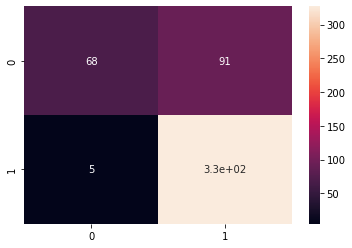

In [36]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=2000)
model_Train(model,x_train,y_train)

Testing Accuracy of our model is equal 83.74 %.
Recall: 0.978
Precision: 0.830
F1-Measure: 0.898


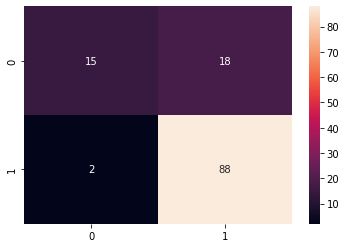

In [37]:
model_Test(model,x_test,y_test)

Training Accuracy of our model is equal 74.34 %.
Train_Recall: 0.904
Train_Precision: 0.761
Train_F1-Measure: 0.826


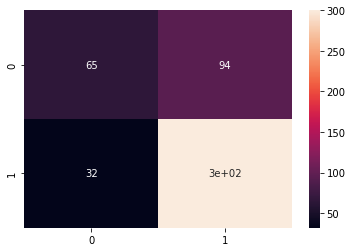

In [38]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=5)
model_Train(model,x_train,y_train)

Testing Accuracy of our model is equal 76.42 %.
Recall: 0.967
Precision: 0.770
F1-Measure: 0.857


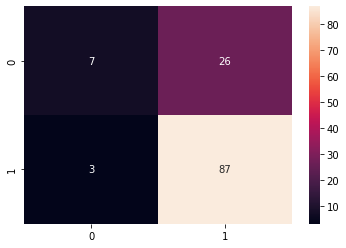

In [39]:
model_Test(model,x_test,y_test)

Training Accuracy of our model is equal 100.0 %.
Train_Recall: 1.000
Train_Precision: 1.000
Train_F1-Measure: 1.000


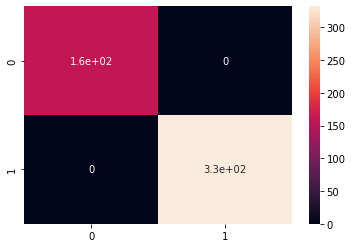

In [40]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
model=RandomForestClassifier()
model_Train(model,x_train,y_train)

Testing Accuracy of our model is equal 100.0 %.
Recall: 1.000
Precision: 1.000
F1-Measure: 1.000


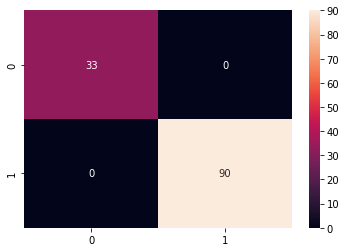

In [41]:
model_Test(model,x_test,y_test)

Training Accuracy of our model is equal 100.0 %.
Train_Recall: 1.000
Train_Precision: 1.000
Train_F1-Measure: 1.000


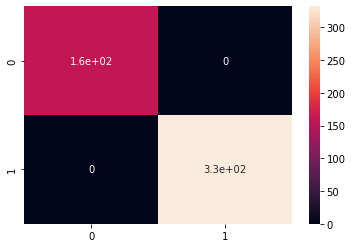

In [42]:
model=ExtraTreesClassifier()
model_Train(model,x_train,y_train)

Testing Accuracy of our model is equal 100.0 %.
Recall: 1.000
Precision: 1.000
F1-Measure: 1.000


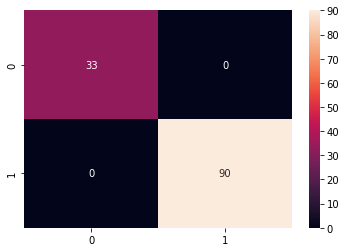

In [43]:
model_Test(model,x_test,y_test)

# Hyper_parameter Tuning

Training Accuracy of our model is equal 80.65 %.
Train_Recall: 0.988
Train_Precision: 0.783
Train_F1-Measure: 0.874


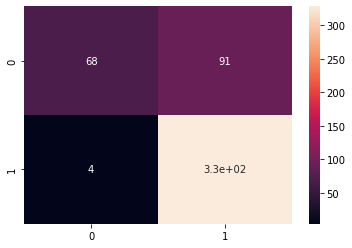

In [44]:
model =ExtraTreesClassifier (n_estimators=1000, min_samples_split=25, max_depth=7, max_features=1)
model_Train(model,x_train,y_train)

Testing Accuracy of our model is equal 83.74 %.
Recall: 0.978
Precision: 0.830
F1-Measure: 0.898


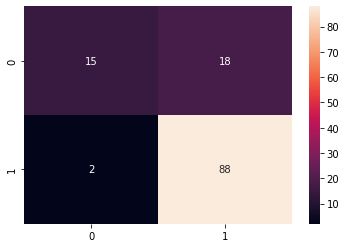

In [45]:
model_Test(model,x_test,y_test)

Training Accuracy of our model is equal 82.28 %.
Train_Recall: 0.988
Train_Precision: 0.798
Train_F1-Measure: 0.883


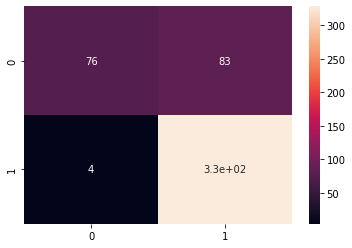

In [46]:
model = RandomForestClassifier(n_estimators=1000, min_samples_split=25, max_depth=7, max_features=1)
model_Train(model,x_train,y_train)

Testing Accuracy of our model is equal 86.18 %.
Recall: 0.989
Precision: 0.848
F1-Measure: 0.913


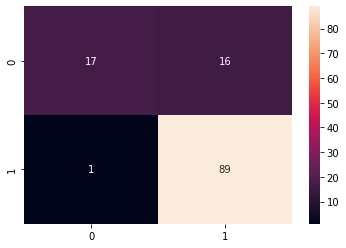

In [47]:
model_Test(model,x_test,y_test)

In [48]:
p=model.predict(X)
df['Predicted_loan']=p

In [49]:
df

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome,ApplicantIncomeLog,CoapplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Credit_History_Log,TotalIncomeLog,Predicted_loan
0,1,0,0,0,0,128.0,360.0,1.0,2,1,5849.0,8.674197,0.000000,4.859812,5.888878,0.693147,8.674197,1
1,1,1,1,0,0,128.0,360.0,1.0,0,0,6091.0,8.430327,7.319202,4.859812,5.888878,0.693147,8.714732,1
2,1,1,0,0,1,66.0,360.0,1.0,2,1,3000.0,8.006701,0.000000,4.204693,5.888878,0.693147,8.006701,1
3,1,1,0,1,0,120.0,360.0,1.0,2,1,4941.0,7.857094,7.765993,4.795791,5.888878,0.693147,8.505525,1
4,1,0,0,0,0,141.0,360.0,1.0,2,1,6000.0,8.699681,0.000000,4.955827,5.888878,0.693147,8.699681,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,71.0,360.0,1.0,0,1,2900.0,7.972811,0.000000,4.276666,5.888878,0.693147,7.972811,1
610,1,1,3,0,0,40.0,180.0,1.0,0,1,4106.0,8.320448,0.000000,3.713572,5.198497,0.693147,8.320448,1
611,1,1,1,0,0,253.0,360.0,1.0,2,1,8312.0,8.996280,5.484797,5.537334,5.888878,0.693147,9.025576,1
612,1,1,2,0,0,187.0,360.0,1.0,2,1,7583.0,8.933796,0.000000,5.236442,5.888878,0.693147,8.933796,1


In [50]:
df1["Predicted_loan"]=df["Predicted_loan"]

In [51]:
df1=df1.replace({'Predicted_loan':{1:'Y',0:'N'}})

In [52]:
df1.sample(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Predicted_loan
379,LP002225,Male,Yes,2,Graduate,No,5391,0.0,130.0,360.0,1.0,Urban,Y,Y
344,LP002128,Male,Yes,2,Graduate,NaN,2583,2330.0,125.0,360.0,1.0,Rural,Y,Y
589,LP002926,Male,Yes,2,Graduate,Yes,2726,0.0,106.0,360.0,0.0,Semiurban,N,Y
603,LP002958,Male,No,0,Graduate,No,3676,4301.0,172.0,360.0,1.0,Rural,Y,Y
126,LP001448,NaN,Yes,3+,Graduate,No,23803,0.0,370.0,360.0,1.0,Rural,Y,Y


In [54]:
lid=input('Enter Your Loan_ID NO:')

s1=list(df1['Loan_ID'])
s=0
if lid in s1:
    s=1


if s==0:
    G=input('Enter your Gender-Male/Female:')
    M=input('Enter your Maritial Status-Yes/No:')
    D=int(input('Enter Dependents:'))
    E=input('Enter your Education-Graduate/Not Graduate:')
    SE=input('Self_Employed-Yes/No:')
    LA=float(input('Enter LoanAmount in k:'))
    LAT=float(input('Enter Loan_Amount_Term 60 as a year:'))
    CH=float(input('Enter Credit_History:'))
    A=input('Enter your Area-Urban/SemiUrban/Rural:')
    AI=float(input('Enter ApplicantIncome:'))
    if AI<=0:
        AIL=0
    else:
        AIL=np.log(AI)
        COI=float(input('Enter CoapplicantIncome:'))
    if COI<=0:
        COIL=0
    else:
        COIL=np.log(COI)
    TI=AI+COI
    if LA<=0:
        LAL=0
    else:
        LAL=np.log(LA)
    if LAT<=0:
        LALT=0
    else:
        LATL=np.log(LAT)
    CHL=np.log(CH)
    TIL=np.log(TI)
    dataf=pd.DataFrame({"Gender":[G],"Married":[M],"Dependents":[D],"Education":[E],"Self_Employed":[SE],"LoanAmount":[LA],"Loan_Amount_Term":[LAT],"Credit_History":[CH],"Property_Area":[A],"TotalIncome":[TI],"ApplicantIncomeLog":[AIL],"CoapplicantIncomeLog":[COIL],"LoanAmountLog":[LAL],"Loan_Amount_Term_Log":[LATL],"Credit_History_Log":[CHL],"TotalIncomeLog":[TIL]})
df1[df1['Loan_ID'] == lid]

Enter Your Loan_ID NO:LP001448655
Enter your Gender-Male/Female:Male
Enter your Maritial Status-Yes/No:Yes
Enter Dependents:3
Enter your Education-Graduate/Not Graduate:Graduate
Self_Employed-Yes/No:Yes
Enter LoanAmount in k:500
Enter Loan_Amount_Term 60 as a year:360
Enter Credit_History:1
Enter your Area-Urban/SemiUrban/Rural:Urban
Enter ApplicantIncome:10000
Enter CoapplicantIncome:0


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Predicted_loan


In [55]:
from sklearn.preprocessing import LabelEncoder
if s==0:

    cols=['Gender','Married','Education','Self_Employed','Property_Area','Dependents']
    le=LabelEncoder()
    for c in cols:
        dataf[c]=le.fit_transform(dataf[c])

In [56]:
if s==0:
    p=model.predict(dataf)
    dataf['Predicted_loan']=p
    dataf=dataf.replace({'Predicted_loan':{1:'Yes',0:'N0'}})
    print("Loan-Approved:",dataf['Predicted_loan'])

Loan-Approved: 0    Yes
Name: Predicted_loan, dtype: object
